<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

План работы:
1. Изучить общую информацию из датафрейма.
2. Разделите исходные данные на обучающую, валидационную и тестовую выборки.
3. Подготовить данные для дальнейшего анализа.
4. Исследовать баланс классов в целевом признаке.
5. Обучить модели без учета дисбаланса и найти значения метрик F1 и AUC-ROC.
6. Устранить дисбаланс классов с помощью различных техник.
7. Обучить модели на сбалансированных данных и оценить их качества.
8. Найти наилучшую модель.
9. Проверить качество выбранной модели на тестовой выборке.

## Подготовка данных

In [373]:
# pip install nb_black

<IPython.core.display.Javascript object>

In [374]:
#%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [375]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

<IPython.core.display.Javascript object>

Изучим данные.

In [376]:
df = pd.read_csv("/datasets/Churn.csv", sep=",")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<IPython.core.display.Javascript object>

Видим, что в датафрейме присутствует достаточно много категориальных признаков: `Geograpy`, `Gender`, `HasCrCard`, `IsActiveMember`. Целевой признак `Exited` также является категориальным.

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

В столбце `Tenure` присутствуют пропуски. Для них создадим отдельную категорию "Unknown", говорящую, что нет данных о том, сколько лет человек является клиентом банка. Предварительно поменяем тип данных этого столбца на object.

In [378]:
df["Tenure"] = df["Tenure"].astype("object")

<IPython.core.display.Javascript object>

In [379]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure              object
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<IPython.core.display.Javascript object>

In [380]:
df["Tenure"].fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

In [381]:
df["Tenure"].value_counts()

1.0        952
2.0        950
8.0        933
3.0        928
5.0        927
7.0        925
Unknown    909
4.0        885
9.0        882
6.0        881
10.0       446
0.0        382
Name: Tenure, dtype: int64

<IPython.core.display.Javascript object>

Видим, что столбец `Tenure` можно считать категориальным признаком.

Удалим столбцы `RowNumber`, `CustomerId`, `Surname` из полученных датафреймов, так как они неинформативны для дальнейшего анализа.

In [382]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [383]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<IPython.core.display.Javascript object>

Далее для того, чтобы преобразовать категориальные признаки в численные используем технику прямого кодирования(OHE), так как она работает со всеми моделями.

Применим прямое кодирование ко всему датафрейму.

In [384]:
df_ohe = pd.get_dummies(df, drop_first=True)

<IPython.core.display.Javascript object>

In [385]:
df_ohe.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_Unknown
0,619,42,0.00,1,1,1,101348.88,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,1,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

Разделим исходные данные на две выборки: обучающая(80%) и тестовая(20%).
Признаки полученных выборок запишем в features_train, features_test.
Целевой признак запишем в target_train, target_test.

In [386]:
target = df_ohe["Exited"]
features = df_ohe.drop("Exited", axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target
)

<IPython.core.display.Javascript object>

Полученные выборки имеют следующие размеры:

In [387]:
features_train.shape

(8000, 21)

<IPython.core.display.Javascript object>

In [388]:
target_train.shape

(8000,)

<IPython.core.display.Javascript object>

In [389]:
features_test.shape

(2000, 21)

<IPython.core.display.Javascript object>

In [390]:
target_test.shape

(2000,)

<IPython.core.display.Javascript object>

In [391]:
df_ohe.shape

(10000, 22)

<IPython.core.display.Javascript object>

Видим по количеству строк в каждой выборке, что разделение проведено правильно.

Произведем масштабирование количественных признаков: `CreditScore`, `Age`, `Balance`, `NumOfProducts`, `EstimatedSalary`.

In [392]:
numeric = ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<IPython.core.display.Javascript object>

In [393]:
features_train.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,...,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_Unknown
3376,-0.061427,0.106098,0.010530,0.805878,1,1,0.267707,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1315,-0.443298,-1.139433,0.388533,-0.911497,0,0,-1.612531,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2552,-0.525865,0.680958,0.082043,0.805878,1,0,-0.297533,0,1,0,...,0,0,0,0,0,1,0,0,0,0
511,-0.185277,-0.085522,0.159218,0.805878,1,0,-0.040122,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1888,-2.280406,2.022299,-1.224906,0.805878,1,1,1.100176,0,0,1,...,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

Видим, что в столбцах с количественными признаками появились аномальные отрицательные значения, значит, масштабирование этих признаков прошло успешно.

## Исследование задачи

Посмотрим на относительные частоты классов в целевом признаке в df_ohe.

In [394]:
class_frequency = df_ohe["Exited"].value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: Exited, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:>

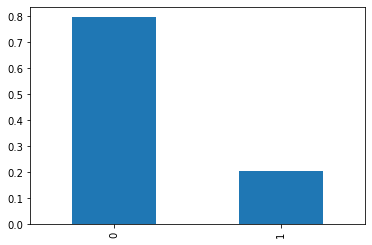

<IPython.core.display.Javascript object>

In [395]:
class_frequency.plot(kind="bar")

Видим, что в целевом признаке наблюдается дисбаланс классов.

In [396]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_train по классам: [6370 1630]
Количество строк в target_test по классам: [1593  407]


<IPython.core.display.Javascript object>

Видим, что дисбаланс классов в `Exited` остается прежним и в полученных выборках.

Найдем наилучшую модель, при которой значение F1-меры максимально.

Рассмотрим первую модель - дерево решений, и найдем ее качество при различных значениях гиперпараметра max_depth (глубина дерева).

In [531]:
clf = DecisionTreeClassifier(random_state=12345)
parameters = {"max_depth": range(1, 5, 1)}
grid_tr = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_tr.fit(features_train, target_train)
grid_tr.best_params_

{'max_depth': 2}

<IPython.core.display.Javascript object>

In [532]:
grid_tr.best_score_

0.5042849417552633

<IPython.core.display.Javascript object>

In [533]:
grid_tr.cv_results_["mean_test_roc_auc"][grid_tr.best_index_]

0.7273001319451801

<IPython.core.display.Javascript object>

Далее обучим модель случайный лес и проверим качество модели при разном количестве деревьев (n_estimators) и глубине дерева (max_depth).

In [526]:
%%time
clf = RandomForestClassifier(random_state=12345)
parameters = {"n_estimators": range(100, 201, 10), "max_depth": range(1, 10, 1)}
grid = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid.fit(features_train, target_train)
grid.best_params_

Wall time: 4min 23s


{'max_depth': 9, 'n_estimators': 100}

<IPython.core.display.Javascript object>

In [527]:
grid.best_score_

0.5259257700644342

<IPython.core.display.Javascript object>

In [528]:
grid.cv_results_["mean_test_roc_auc"][grid.best_index_]

0.8525406670454874

<IPython.core.display.Javascript object>

Рассмотрим следующую модель - логистическую регрессию.

In [235]:
clf = LogisticRegression(random_state=12345, solver="liblinear")
parameters = {"max_iter": range(100, 1000, 100)}
grid_log = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_log.fit(features_train, target_train)
grid_log.best_params_

{'max_iter': 100}

<IPython.core.display.Javascript object>

In [236]:
grid_log.best_score_

0.32150328628656755

<IPython.core.display.Javascript object>

In [237]:
grid_log.cv_results_["mean_test_roc_auc"][grid_log.best_index_]

0.7601323304215504

<IPython.core.display.Javascript object>

Видим, что на обучающей выборке наилучшим качеством обладает модель случайного леса с 100 деревьями и глубиной дерева 9. При таких параметрах F1-мера равна 0.5259257700644342, метрика AUC-ROC равна 0.8525406670454874.

Разделим обучающую выборку на тренировочную и валидационную.

In [308]:
(
    features_train_thr,
    features_valid_thr,
    target_train_thr,
    target_valid_thr,
) = train_test_split(
    features_train,
    target_train,
    test_size=0.2,
    random_state=12345,
    stratify=target_train,
)

<IPython.core.display.Javascript object>

In [309]:
print(
    f"Количество строк в target_train_thr по классам: {np.bincount(target_train_thr)}"
)
print(
    f"Количество строк в target_valid_thr по классам: {np.bincount(target_valid_thr)}"
)

Количество строк в target_train_thr по классам: [5096 1304]
Количество строк в target_valid_thr по классам: [1274  326]


<IPython.core.display.Javascript object>

In [317]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")

Количество строк в target_train по классам: [6370 1630]


<IPython.core.display.Javascript object>

Видмим, что в target_train_thr и target_valid_thr дисбаланс классов остался прежним.

Построим AUC-ROC кривую для лучшей модели случайного леса.

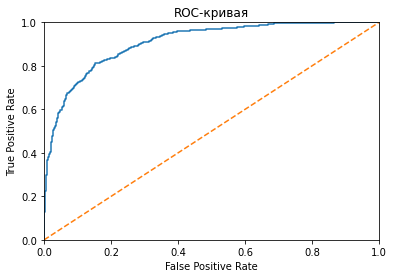

<IPython.core.display.Javascript object>

In [534]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=9)
model.fit(features_train_thr, target_train_thr)
probabilities_valid = model.predict_proba(features_valid_thr)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(
    target_valid_thr, probabilities_one_valid
)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

Из полученного графика можно сделать вывод, что наша модель с высоким качеством.

Изучим изменение значений метрик при изменении значения порога для полученной наилучшей модели.

In [535]:
best_f1_score = 0
best_auc_score = 0
best_threshold = 0
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    auc_roc = roc_auc_score(target_valid_thr, probabilities_one_valid)
    f1 = f1_score(target_valid_thr, predicted_valid)
    if f1 > best_f1_score:
        best_auc_score = auc_roc
        best_f1_score = f1
        best_threshold = threshold
print("f1_score наилучшей модели на валидационной выборке:", best_f1_score)
print("auc_roc_score наилучшей модели на валидационной выборке:", best_auc_score)
print("Порог:", best_threshold)

f1_score наилучшей модели на валидационной выборке: 0.7674278846153845
auc_roc_score наилучшей модели на валидационной выборке: 0.9081217314674809
Порог: 0.28


<IPython.core.display.Javascript object>

Как видим, при уменьшении порога до 0.28 значение F1-меры увеличилось, метрика AUC-ROC также выросла.

## Борьба с дисбалансом

Попробуем улучшить качество моделе, учитывая дисбаланс классов.

Получим значение метрик при использовании взвешивания классов. Придадим объектам редкого класса больший вес.

Рассмотрим первую модель - дерево решений, и найдем ее качество при различных значениях гиперпараметра max_depth (глубина дерева).

In [536]:
clf = DecisionTreeClassifier(random_state=12345, class_weight="balanced")
parameters = {"max_depth": range(2, 5, 1)}
grid_tr = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_tr.fit(features_train, target_train)
grid_tr.best_params_

{'max_depth': 4}

<IPython.core.display.Javascript object>

In [537]:
grid_tr.best_score_

0.5434528438449531

<IPython.core.display.Javascript object>

In [538]:
grid_tr.cv_results_["mean_test_roc_auc"][grid_tr.best_index_]

0.8162981190588552

<IPython.core.display.Javascript object>

Далее обучим модель случайный лес и проверим качество модели при разном количестве деревьев (n_estimators) и глубине дерева (max_depth).

In [540]:
%%time
clf = RandomForestClassifier(random_state=12345, class_weight='balanced')
parameters = {"n_estimators": range(100, 201, 10), "max_depth": range(1, 7, 1)}
grid = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid.fit(features_train, target_train)
grid.best_params_

Wall time: 2min 27s


{'max_depth': 6, 'n_estimators': 150}

<IPython.core.display.Javascript object>

In [541]:
grid.best_score_

0.5928978914534571

<IPython.core.display.Javascript object>

In [542]:
grid.cv_results_["mean_test_roc_auc"][grid.best_index_]

0.8504892565804048

<IPython.core.display.Javascript object>

Рассмотрим следующую модель - логистическую регрессию.

In [249]:
clf = LogisticRegression(
    random_state=12345, solver="liblinear", class_weight="balanced"
)
parameters = {"max_iter": range(100, 1000, 100)}
grid_log = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_log.fit(features_train, target_train)
grid_log.best_params_

{'max_iter': 100}

<IPython.core.display.Javascript object>

In [250]:
grid_log.best_score_

0.4865748052482851

<IPython.core.display.Javascript object>

In [251]:
grid_log.cv_results_["mean_test_roc_auc"][grid_log.best_index_]

0.7632055937051555

<IPython.core.display.Javascript object>

Видим, что на обучающей выборке наилучшим качеством обладает модель случайного леса с 150 деревьями и глубиной дерева 6. При таких параметрах F1-мера равна 0.5928978914534571, метрика AUC-ROC равна 0.8504892565804048.

Теперь найдем значения метрик качества моделей после применения техники upsampling.

In [252]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

<IPython.core.display.Javascript object>

In [253]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(6370, 21)
(1630, 21)
(6370,)
(1630,)


<IPython.core.display.Javascript object>

Как видим, отрицательных объектов в обучающей выборке почти в 4 раза больше, чем положительных, поэтому увеличим количество объектов с единицами в 4 раза.

In [254]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

<IPython.core.display.Javascript object>

Проверим размеры новой выборки.

In [289]:
features_zeros = features_upsampled[target_upsampled == 0]
features_ones = features_upsampled[target_upsampled == 1]
target_zeros = target_upsampled[target_upsampled == 0]
target_ones = target_upsampled[target_upsampled == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(6370, 21)
(6520, 21)
(6370,)
(6520,)


<IPython.core.display.Javascript object>

Видим, что количество положительных и отрицательных объектов примерно равно.

Найдем качество моделей с измененной обучающей выборкой.

Рассмотрим первую модель - дерево решений, и найдем ее качество при различных значениях гиперпараметра max_depth (глубина дерева).

In [509]:
clf = DecisionTreeClassifier(random_state=12345)
parameters = {"max_depth": range(1, 6, 1)}
grid_tr = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_tr.fit(features_upsampled, target_upsampled)
grid_tr.best_params_

{'max_depth': 5}

<IPython.core.display.Javascript object>

In [510]:
grid_tr.best_score_

0.7775939638864013

<IPython.core.display.Javascript object>

In [511]:
grid_tr.cv_results_["mean_test_roc_auc"][grid_tr.best_index_]

0.845632445993971

<IPython.core.display.Javascript object>

Далее обучим модель случайный лес и проверим качество модели при разном количестве деревьев (n_estimators) и глубине дерева (max_depth).

In [491]:
%%time
clf = RandomForestClassifier(random_state=12345)
parameters = {"n_estimators": range(100, 201, 20), "max_depth": range(1, 7, 1)}
grid = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid.fit(features_upsampled, target_upsampled)
grid.best_params_

Wall time: 1min 47s


{'max_depth': 6, 'n_estimators': 160}

<IPython.core.display.Javascript object>

In [492]:
grid.best_score_

0.7778368949979247

<IPython.core.display.Javascript object>

In [493]:
grid.cv_results_["mean_test_roc_auc"][grid.best_index_]

0.8669196217892535

<IPython.core.display.Javascript object>

Рассмотрим следующую модель - логистическую регрессию.

In [267]:
clf = LogisticRegression(random_state=12345, solver="liblinear")
parameters = {"max_iter": range(100, 1000, 100)}
grid_log = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_log.fit(features_upsampled, target_upsampled)
grid_log.best_params_

{'max_iter': 100}

<IPython.core.display.Javascript object>

In [268]:
grid_log.best_score_

0.700858706792425

<IPython.core.display.Javascript object>

In [269]:
grid_log.cv_results_["mean_test_roc_auc"][grid_log.best_index_]

0.7664141730311756

<IPython.core.display.Javascript object>

Видим, что на обучающей выборке наилучшим качеством обладает модель случайного леса с 160 деревьями и глубиной дерева 6. При таких параметрах F1-мера равна 0.7778368949979247, метрика AUC-ROC равна 0.8669196217892535.

Попробуем решить проблему дисбаланса классов техникой downsampling. Для этого сократим количество отрицательных объектов в 4 раза.

In [270]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

<IPython.core.display.Javascript object>

In [294]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

<IPython.core.display.Javascript object>

Проверим размеры новой выборки.

In [295]:
features_zeros = features_downsampled[target_downsampled == 0]
features_ones = features_downsampled[target_downsampled == 1]
target_zeros = target_downsampled[target_downsampled == 0]
target_ones = target_downsampled[target_downsampled == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(1592, 21)
(1630, 21)
(1592,)
(1630,)


<IPython.core.display.Javascript object>

Видим, что количество положительных и отрицательных объектов примерно равно.

Найдем качество моделей с измененной обучающей выборкой.

Рассмотрим первую модель - дерево решений, и найдем ее качество при различных значениях гиперпараметра max_depth (глубина дерева).

In [543]:
clf = DecisionTreeClassifier(random_state=12345)
parameters = {"max_depth": range(1, 5, 1)}
grid_tr = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_tr.fit(features_downsampled, target_downsampled)
grid_tr.best_params_

{'max_depth': 4}

<IPython.core.display.Javascript object>

In [544]:
grid_tr.best_score_

0.7506024565823761

<IPython.core.display.Javascript object>

In [545]:
grid_tr.cv_results_["mean_test_roc_auc"][grid_tr.best_index_]

0.8212535816350315

<IPython.core.display.Javascript object>

Далее обучим модель случайный лес и проверим качество модели при разном количестве деревьев (n_estimators) и глубине дерева (max_depth).

In [546]:
%%time
clf = RandomForestClassifier(random_state=12345)
parameters = {"n_estimators": range(100, 201, 10), "max_depth": range(1, 6, 1)}
grid = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid.fit(features_downsampled, target_downsampled)
grid.best_params_

Wall time: 1min 12s


{'max_depth': 5, 'n_estimators': 200}

<IPython.core.display.Javascript object>

In [547]:
grid.best_score_

0.7689538836970773

<IPython.core.display.Javascript object>

In [548]:
grid.cv_results_["mean_test_roc_auc"][grid.best_index_]

0.8507100857173302

<IPython.core.display.Javascript object>

Рассмотрим следующую модель - логистическую регрессию.

In [446]:
clf = LogisticRegression(random_state=12345, solver="liblinear")
parameters = {"max_iter": range(100, 1000, 100)}
grid_log = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_log.fit(features_downsampled, target_downsampled)
grid_log.best_params_

{'max_iter': 100}

<IPython.core.display.Javascript object>

In [447]:
grid_log.best_score_

0.7007007579453887

<IPython.core.display.Javascript object>

In [448]:
grid_log.cv_results_["mean_test_roc_auc"][grid_log.best_index_]

0.764199954448267

<IPython.core.display.Javascript object>

Видим, что на обучающей выборке наилучшим качеством обладает модель случайного леса с 200 деревьями и глубиной дерева 5. При таких параметрах F1-мера равна 0.7689538836970773, метрика AUC-ROC равна 0.8507100857173302.

Теперь попробуем по очереди использовать техники upsampling и downsampling, то есть увеличим количество положительных объектов в 2 раза и уменьшим количество отрицательных элементов в 2 раза.

In [291]:
def upanddownsample(features, target, repeat, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_zeros = features_upsampled[target_upsampled == 0]
    features_ones = features_upsampled[target_upsampled == 1]
    target_zeros = target_upsampled[target_upsampled == 0]
    target_ones = target_upsampled[target_upsampled == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

<IPython.core.display.Javascript object>

In [297]:
features_upanddownsampled, target_upanddownsampled = upanddownsample(
    features_train, target_train, 2, 0.5
)

<IPython.core.display.Javascript object>

Проверим размеры новой выборки.

In [298]:
features_zeros = features_upanddownsampled[target_upanddownsampled == 0]
features_ones = features_upanddownsampled[target_upanddownsampled == 1]
target_zeros = target_upanddownsampled[target_upanddownsampled == 0]
target_ones = target_upanddownsampled[target_upanddownsampled == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(3185, 21)
(3260, 21)
(3185,)
(3260,)


<IPython.core.display.Javascript object>

Видим, что количество положительных и отрицательных объектов примерно равно.

Найдем качество моделей с измененной обучающей выборкой.

Рассмотрим первую модель - дерево решений, и найдем ее качество при различных значениях гиперпараметра max_depth (глубина дерева).

In [461]:
clf = DecisionTreeClassifier(random_state=12345)
parameters = {"max_depth": range(2, 5, 1)}
grid_tr = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_tr.fit(features_upanddownsampled, target_upanddownsampled)
grid_tr.best_params_

{'max_depth': 4}

<IPython.core.display.Javascript object>

In [462]:
grid_tr.best_score_

0.7432304713669591

<IPython.core.display.Javascript object>

In [463]:
grid_tr.cv_results_["mean_test_roc_auc"][grid_tr.best_index_]

0.8185915092795023

<IPython.core.display.Javascript object>

Далее обучим модель случайный лес и проверим качество модели при разном количестве деревьев (n_estimators) и глубине дерева (max_depth).

In [549]:
%%time
clf = RandomForestClassifier(random_state=12345)
parameters = {"n_estimators": range(100, 201, 10), "max_depth": range(1, 6, 1)}
grid = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid.fit(features_upanddownsampled, target_upanddownsampled)
grid.best_params_

Wall time: 1min 43s


{'max_depth': 5, 'n_estimators': 180}

<IPython.core.display.Javascript object>

In [550]:
grid.best_score_

0.7711256951130416

<IPython.core.display.Javascript object>

In [551]:
grid.cv_results_["mean_test_roc_auc"][grid.best_index_]

0.8535552965877242

<IPython.core.display.Javascript object>

Рассмотрим следующую модель - логистическую регрессию.

In [305]:
clf = LogisticRegression(random_state=12345, solver="liblinear")
parameters = {"max_iter": range(100, 1000, 100)}
grid_log = GridSearchCV(clf, parameters, cv=5, scoring=["f1", "roc_auc"], refit="f1")
grid_log.fit(features_upanddownsampled, target_upanddownsampled)
grid_log.best_params_

{'max_iter': 100}

<IPython.core.display.Javascript object>

In [306]:
grid_log.best_score_

0.6945572566727634

<IPython.core.display.Javascript object>

In [307]:
grid_log.cv_results_["mean_test_roc_auc"][grid_log.best_index_]

0.7596724484980402

<IPython.core.display.Javascript object>

Видим, что на обучающей выборке наилучшим качеством обладает модель случайного леса с 180 деревьями и глубиной дерева 5. При таких параметрах F1-мера равна 0.7711256951130416, метрика AUC-ROC равна 0.8535552965877242.

Итак, для сбалансированной выборки лучший результат показала модель случайного леса с 160 деревьями и глубиной дерева 6 после применения техники upsamplig. При таких параметрах F1-мера равна 0.7778368949979247, метрика AUC-ROC равна 0.8669196217892535.

In [325]:
(
    features_train_thr,
    features_valid_thr,
    target_train_thr,
    target_valid_thr,
) = train_test_split(
    features_upsampled,
    target_upsampled,
    test_size=0.2,
    random_state=12345,
    stratify=target_upsampled,
)

<IPython.core.display.Javascript object>

In [326]:
print(
    f"Количество строк в target_train_thr по классам: {np.bincount(target_train_thr)}"
)
print(
    f"Количество строк в target_valid_thr по классам: {np.bincount(target_valid_thr)}"
)

Количество строк в target_train_thr по классам: [5096 5216]
Количество строк в target_valid_thr по классам: [1274 1304]


<IPython.core.display.Javascript object>

In [327]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")

Количество строк в target_train по классам: [6370 1630]


<IPython.core.display.Javascript object>

Видмим, что в target_train_thr и target_valid_thr дисбаланс классов остался прежним.

Построим AUC-ROC кривую для лучшей модели случайного леса.

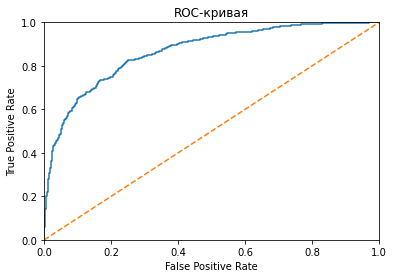

<IPython.core.display.Javascript object>

In [552]:
model = RandomForestClassifier(random_state=12345, n_estimators=160, max_depth=6)
model.fit(features_train_thr, target_train_thr)
probabilities_valid = model.predict_proba(features_valid_thr)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(
    target_valid_thr, probabilities_one_valid
)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

Из полученного графика можно сделать вывод, что наша модель обладает достаточно высоким качеством.

Изучим изменение значений метрик при изменении значения порога для полученной наилучшей модели.

In [555]:
best_f1_score = 0
best_auc_score = 0
best_threshold = 0
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    auc_roc = roc_auc_score(target_valid_thr, probabilities_one_valid)
    f1 = f1_score(target_valid_thr, predicted_valid)
    if f1 > best_f1_score:
        best_auc_score = auc_roc
        best_f1_score = f1
        best_threshold = threshold
print("f1_score наилучшей модели на валидационной выборке:", best_f1_score)
print("auc_roc_score наилучшей модели на валидационной выборке:", best_auc_score)
print("Порог:", best_threshold)

f1_score наилучшей модели на валидационной выборке: 0.7258926061287602
auc_roc_score наилучшей модели на валидационной выборке: 0.8665878928258421
Порог: 0.28


<IPython.core.display.Javascript object>

Как видим, при уменьшении порога до 0.28 значение F1-меры уменьшилось, метрика AUC-ROC почти не изменилась.

В результате получаем, что наилучшие результаты показала модель случайного леса с количеством деревьев 160 и глубиной дерева 6, примененная к сбалансированной выборке после использования техники upsampling.

## Тестирование модели

Найдем значения метрик F1 и AUC-ROC для лучшей модели на тестовой выборке.

In [556]:
model = RandomForestClassifier(random_state=12345, n_estimators=160, max_depth=6)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_test)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
# predicted_valid = probabilities_one_valid > 0.72
f1 = f1_score(target_test, predicted_valid)
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print("f1_score наилучшей модели на тестовой выборке:", f1)
print("roc_auc_score наилучшей модели на тестовой выборке:", auc_roc)

f1_score наилучшей модели на тестовой выборке: 0.6019047619047619
roc_auc_score наилучшей модели на тестовой выборке: 0.8602439110913689


<IPython.core.display.Javascript object>

Видим, что на тестовой выборке F1-мера на выбранной лучшей модели равна 0.6019047619047619, этот показатель значительно ниже, чем на обучающей выборке, но все равно достаточно высокий. Из этого наблюдения можно сделать вывод, что присутствует переобучение модели. Значение AUC-ROC меры при этом почти не изменилось.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*